In [14]:
from sunpy.net import Fido, attrs
from datetime import datetime, timedelta
import astropy.units as u 
import os 
from glob import glob
from __future__ import division, print_function

In [2]:
dttime = datetime(2010, 6, 13, 5, 38, 0)
sform = '%Y/%m/%d %H:%M:%S'
dt = timedelta(seconds = 60) 
start = datetime.strftime(dttime, sform) 
end = datetime.strftime(dttime+dt, sform) 

time = attrs.Time(start, end) 
ins = attrs.Instrument('aia') # set the instrument to aia 
wave193 = attrs.Wavelength(193*u.AA)
wave211 = attrs.Wavelength(211*u.AA) 


result = Fido.search(time, ins, wave193 | wave211) 
out_path = os.getcwd()+"/"
dl_fil = Fido.fetch(result, path=out_path, wait=True)

[                                        ========================================
[                                        ========================================


In [10]:
fits_193 = glob("./*193a*.fits")
fits_211 = glob("./*211a*.fits")
print(fits_193)
print(fits_211)

['./aia_lev1_193a_2010_06_13t05_38_30_61z_image_lev1.fits', './aia_lev1_193a_2010_06_13t05_38_06_62z_image_lev1.fits', './aia_lev1_193a_2010_06_13t05_38_54_61z_image_lev1.fits', './aia_lev1_193a_2010_06_13t05_38_42_62z_image_lev1.fits', './aia_lev1_193a_2010_06_13t05_38_18_62z_image_lev1.fits']
['./aia_lev1_211a_2010_06_13t05_38_48_63z_image_lev1.fits', './aia_lev1_211a_2010_06_13t05_38_00_62z_image_lev1.fits', './aia_lev1_211a_2010_06_13t05_38_12_63z_image_lev1.fits', './aia_lev1_211a_2010_06_13t05_38_24_62z_image_lev1.fits', './aia_lev1_211a_2010_06_13t05_38_36_60z_image_lev1.fits', './aia_lev1_211a_2010_06_13t05_39_00_60z_image_lev1.fits']


In [12]:
import sunpy.map as smap

In [13]:
data_193 = smap.Map(fits_193, sequence=True) 
data_211 = smap.Map(fits_211, sequence=True)

In [31]:
from sunpy.instr.aia import aiaprep

for Map in data_193: 
    Map = aiaprep(Map)
    
for Map in data_211: 
    Map = aiaprep(Map)

/home/john/.local/lib/python2.7/site-packages/sunpy/map/mapbase.py:1319: Warning: GenericMap.submap now takes pixel values as `bottom_left` and `top_right` not `range_a` and `range_b`
  " and `top_right` not `range_a` and `range_b`", Warning)


<IPython.core.display.Javascript object>


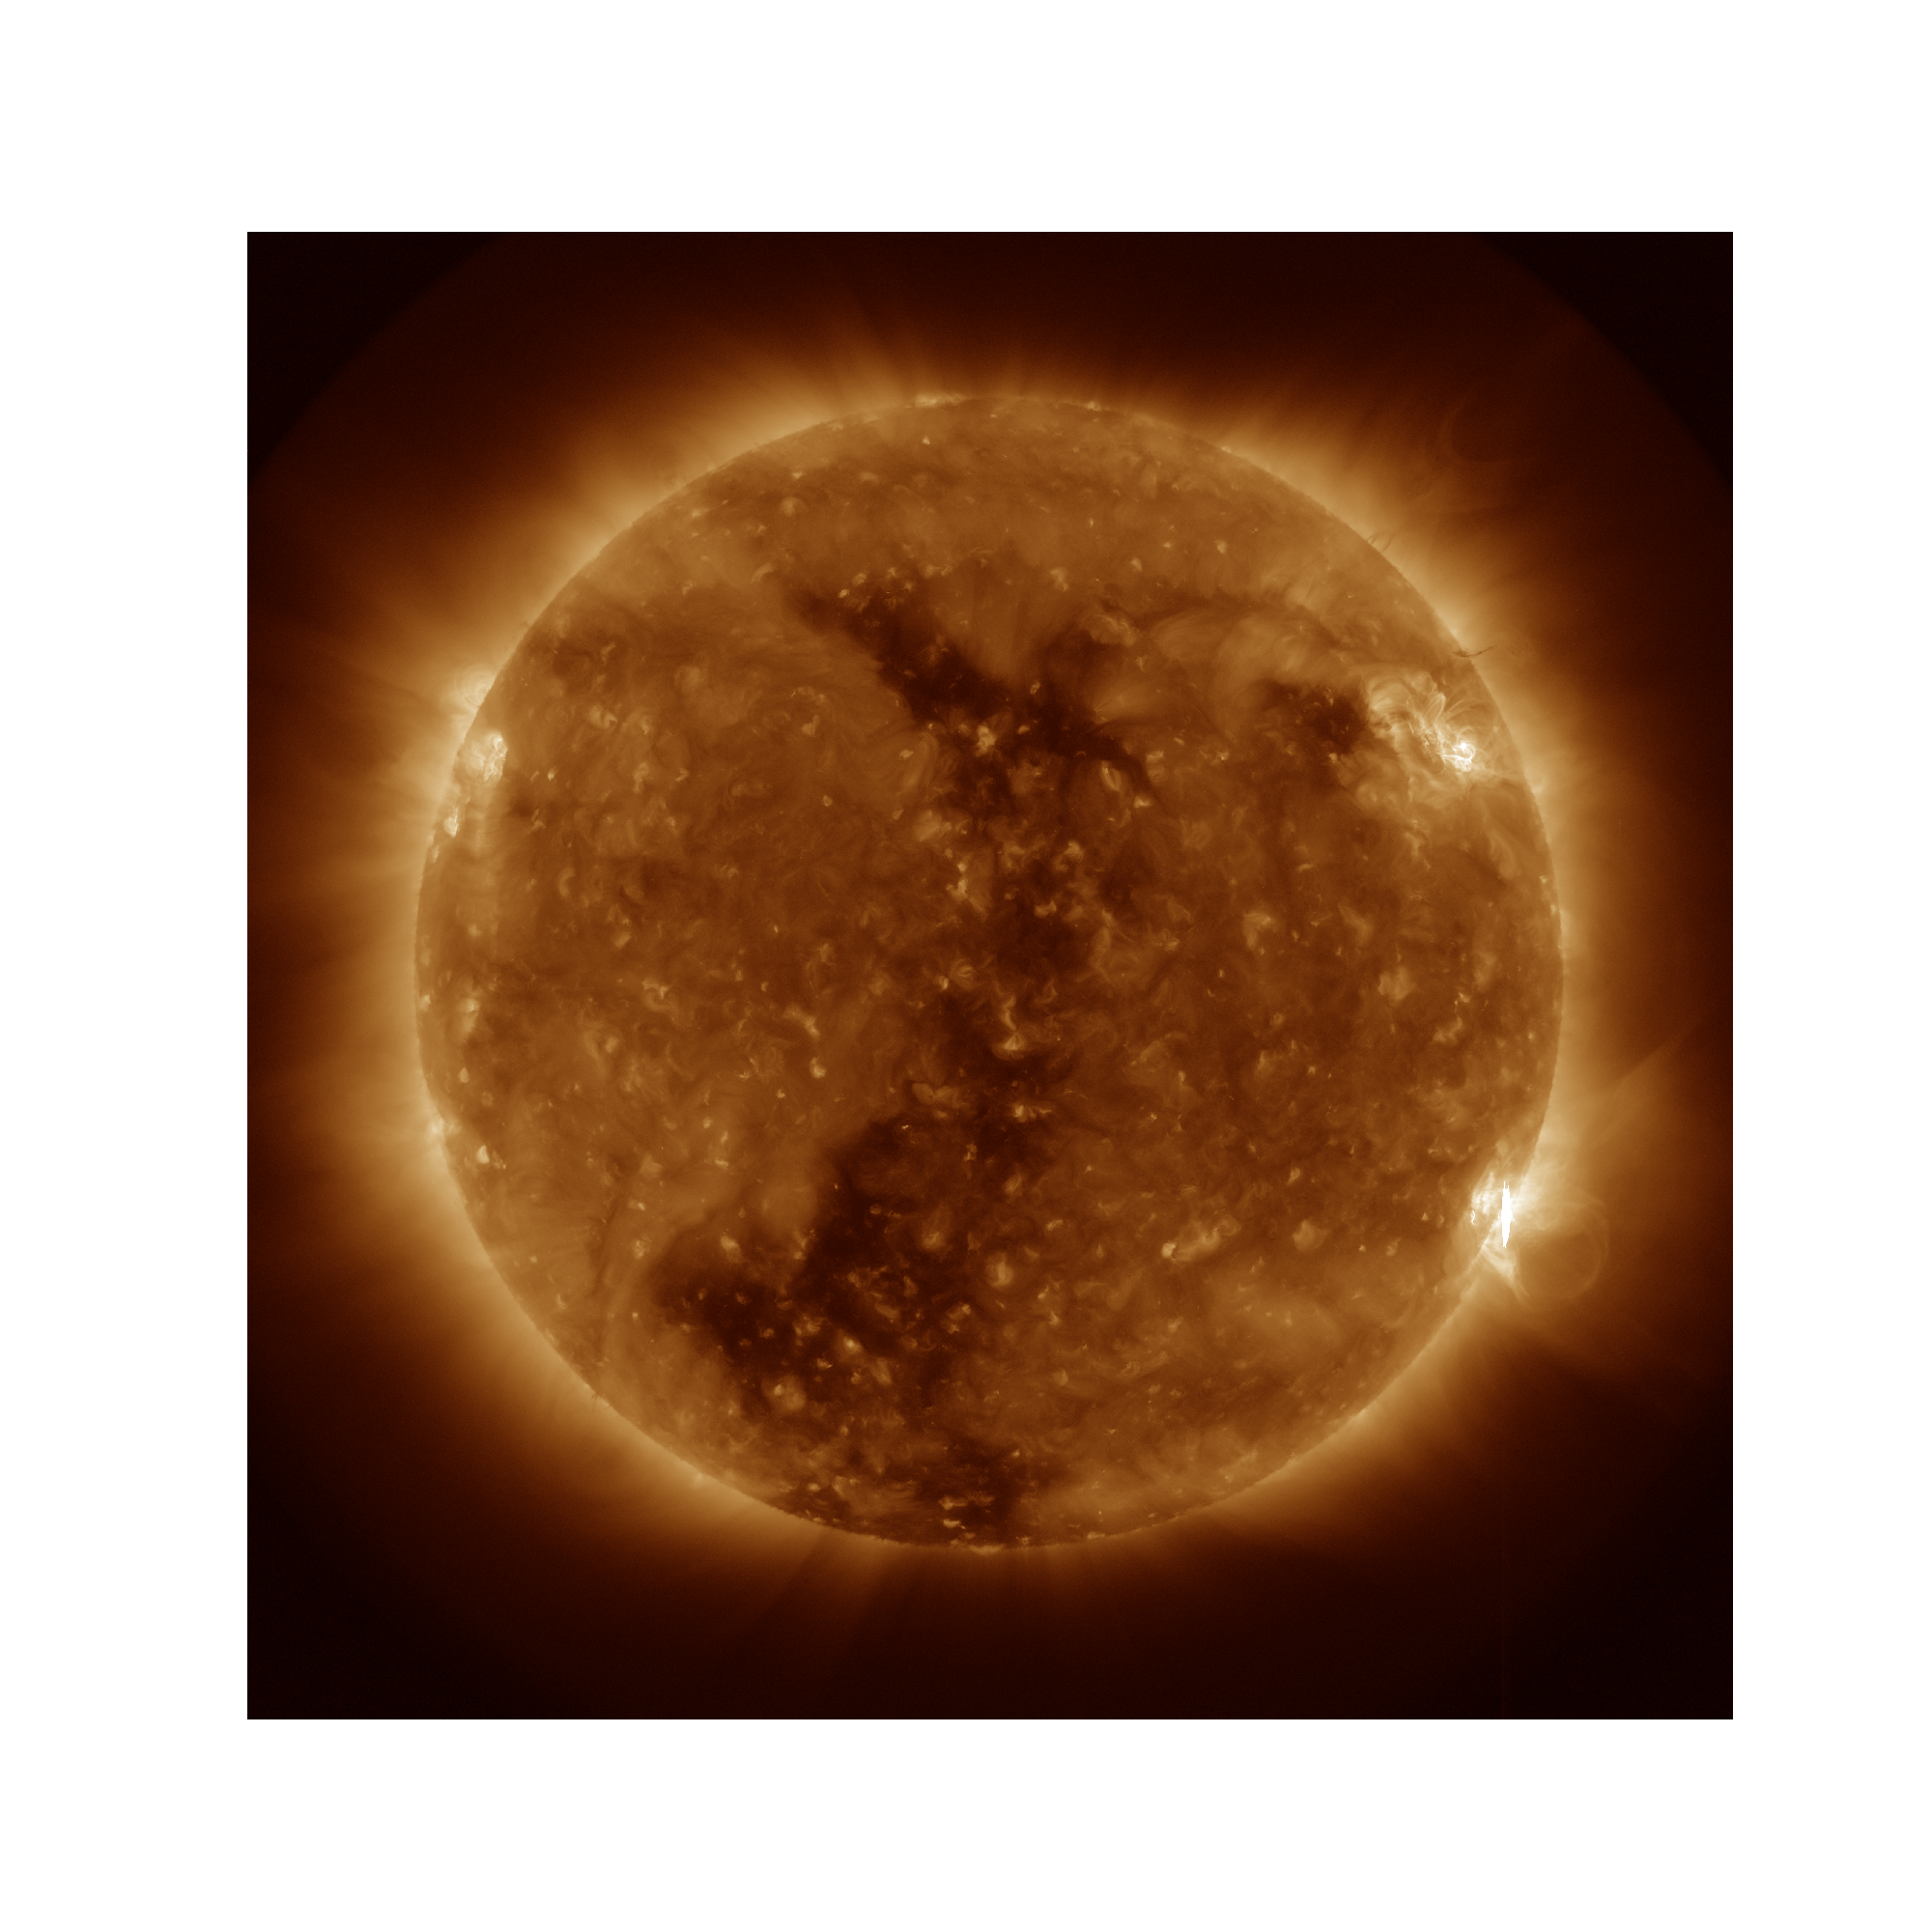

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(20,20)) 
data_193[0].plot(annotate=False, axes=None, title=False)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


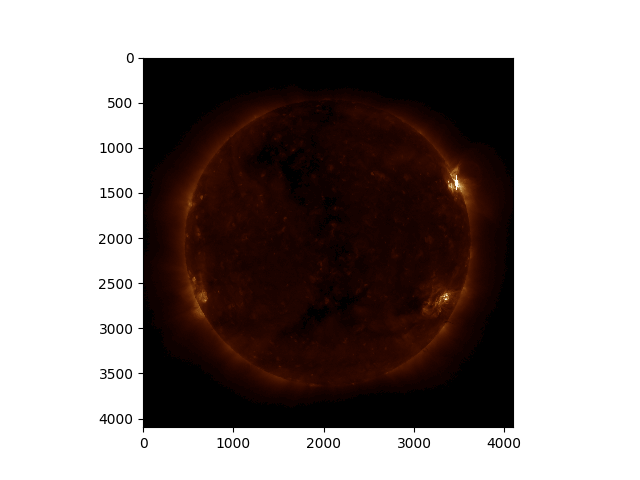

/home/john/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  


In [33]:
%matplotlib notebook
import sunpy.cm as cm #get the colormaps 


plt.figure()
plt.imshow(data_193[0].data, cmap = cm.get_cmap('sdoaia193'))
plt.show()